In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words=set(nltk.corpus.stopwords.words('english'))

In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords  
from nltk.stem import WordNetLemmatizer  
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words=set(nltk.corpus.stopwords.words('english'))

In [13]:
rev = pd.read_csv(r"tweets.csv")
rev.head()

,id,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified
0,7549,2022-08-26 13:56:37.490901+00,CBI Unfold D Truth InSSRCase,1563158353391779844,2022-08-26 13:36:08+00,ATUL7735,ATUL,NaN,301,RT @privin07: @divine__ssr @ATUL7735 Thanks a ...,India,en,4,2011-03-15,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
1,6327,2022-08-26 13:54:52.480426+00,CBI Unfold D Truth InSSRCase,1563163059002101762,2022-08-26 13:54:50+00,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
2,6328,2022-08-26 13:54:52.618819+00,CBI Unfold D Truth InSSRCase,1563163056934334464,2022-08-26 13:54:49+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
3,6329,2022-08-26 13:54:52.656809+00,CBI Unfold D Truth InSSRCase,1563163055390744576,2022-08-26 13:54:49+00,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
4,6330,2022-08-26 13:54:52.696796+00,CBI Unfold D Truth InSSRCase,1563163052102791168,2022-08-26 13:54:48+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False


In [14]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       5232 non-null   int64 
 1   hashtag_generation_time  5232 non-null   object
 2   searched_hashtag         5232 non-null   object
 3   tweet_id                 5232 non-null   int64 
 4   tweet_created_at         5232 non-null   object
 5   screen_name              5232 non-null   object
 6   name                     5232 non-null   object
 7   user_description         4274 non-null   object
 8   followers_count          5232 non-null   int64 
 9   tweet                    5232 non-null   object
 10  location                 2587 non-null   object
 11  iso_language_code        5232 non-null   object
 12  retweet_count            5232 non-null   int64 
 13  user_created_at          5232 non-null   object
 14  favorite_count           5232 non-null  

In [15]:
def clean_text(headline):
      le=WordNetLemmatizer()
      word_tokens=word_tokenize(headline)
      tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
      cleaned_text=" ".join(tokens)
      return cleaned_text
rev['cleaned_text']=rev['tweet'].apply(clean_text)

In [16]:
rev['cleaned_text']

0       privin07 divine__ssr ATUL7735 Thanks Diyu love...
1       keesain99 Unfold Truth InSSRCase Truth justice...
2       ChintuJainHS SatyaSSRian1 PMOIndia DoPTGoI Unf...
3       sushfanseg Rhea Chakraborty custodial interrog...
4       manisha_1604 SatyaSSRian1 PMOIndia DoPTGoI Unf...
                              ...                        
5227    SauravS91139716 Good Morning Warrior Morning b...
5228    GauriSh00526155 privin07 IAmApa07 itsSSR Thank...
5229    Dipshik37409256 According family lawyer Pithan...
5230    rd20082022 Sushant loved life planning colleag...
5231    Dipshik37409256 room body found seem room supe...
Name: cleaned_text, Length: 5232, dtype: object

In [17]:
rev['cleaned_text'][0]

'privin07 divine__ssr ATUL7735 Thanks Diyu lovely word amazing Sushi proud all🙌 Unfo…'

In [18]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)
vect_text=vect.fit_transform(rev['cleaned_text'])

In [19]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=2,
learning_method='online',random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(vect_text)

In [20]:
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Topic  0 :  79.26125405315418 %
Topic  1 :  20.73874594684582 %


In [21]:
vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
     print("Topic "+str(i)+": ")
     for t in sorted_words:
            print(t[0])

Topic 0: 
sushant
rd20082022
case
singh
disha
dipshik37409256
justice
pmoindia
rajput
free
rhea
police
june
said
doptgoi
pithani
murder
death
investigation
itsramya_2506
Topic 1: 
perpetrators
free
inssrcase
pmoindia
hmoindia
ips_nupurprasad
doptgoi
http
co
ips_association
truth
unfold
satya91539128
rd20082022
morning
withoutthemind
thread
rijijuoffice
good
dir_ed


In [22]:
rev.head()

,id,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified,cleaned_text
0,7549,2022-08-26 13:56:37.490901+00,CBI Unfold D Truth InSSRCase,1563158353391779844,2022-08-26 13:36:08+00,ATUL7735,ATUL,NaN,301,RT @privin07: @divine__ssr @ATUL7735 Thanks a ...,India,en,4,2011-03-15,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,privin07 divine__ssr ATUL7735 Thanks Diyu love...
1,6327,2022-08-26 13:54:52.480426+00,CBI Unfold D Truth InSSRCase,1563163059002101762,2022-08-26 13:54:50+00,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,keesain99 Unfold Truth InSSRCase Truth justice...
2,6328,2022-08-26 13:54:52.618819+00,CBI Unfold D Truth InSSRCase,1563163056934334464,2022-08-26 13:54:49+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,ChintuJainHS SatyaSSRian1 PMOIndia DoPTGoI Unf...
3,6329,2022-08-26 13:54:52.656809+00,CBI Unfold D Truth InSSRCase,1563163055390744576,2022-08-26 13:54:49+00,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,sushfanseg Rhea Chakraborty custodial interrog...
4,6330,2022-08-26 13:54:52.696796+00,CBI Unfold D Truth InSSRCase,1563163052102791168,2022-08-26 13:54:48+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,manisha_1604 SatyaSSRian1 PMOIndia DoPTGoI Unf...


In [23]:
rev['name'].nunique()

312

In [24]:
rev['location'].nunique()

105

In [25]:
rev['name'].value_counts()

AmberBlue                            469
Justice For SSR                      241
SSRian 3                             205
Rajesh singh 🇮🇳                      188
Sushant forever                      181
                                    ... 
संजय चव्हाण                            1
Sushant ki 𝓐𝓴𝓪𝓷𝓴𝓼𝓱𝓪 🕊(आकांक्षा) 🤍      1
BOYCOTT LEADER 😎🇮🇳                     1
Shruthi ❤️Shirley ki Di❤️🇮🇳            1
NY Traveler                            1
Name: name, Length: 312, dtype: int64

In [26]:
rev['location'].value_counts()

India                    543
Canada                   187
Memory🫂                  121
In another world         120
🌈                        113
                        ... 
Graveyard 🪦👻               1
Mumbai                     1
Khagaria Bihar India       1
Ranchi                     1
Patna, India               1
Name: location, Length: 105, dtype: int64

In [27]:
rev[rev['name']=='Sushant']['id']

276      7181
341      7220
616      6936
623      6944
634      6954
        ...  
1475     7800
3494     9815
3687    10004
3700    10017
3706    10022
Name: id, Length: 110, dtype: int64

In [28]:
rev['tweet_source'].nunique()

4

In [29]:
rev['tweet_source'].value_counts()

Twitter for Android    3678
Twitter Web App         891
Twitter for iPhone      641
Twitter for iPad         22
Name: tweet_source, dtype: int64

In [41]:
rev['retweet_count'].sum()

221749

In [42]:
rev[rev['followers_count']== rev['followers_count'].max()]

,id,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified,cleaned_text
4237,10551,2022-08-27 09:36:35.364047+00,Perpetrators Free InSSRCase,1563452907282104320,2022-08-27 09:06:35+00,SouravJha_SJ,SJ,Ek Jharkhandi Stock Market Ex-class-monitor 🥹🤓,6251,RT @Unfinished011: Exactly 6 years ago Sushant...,India,en,58,2011-07-03,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,Unfinished011 Exactly year Sushant wrote beaut...


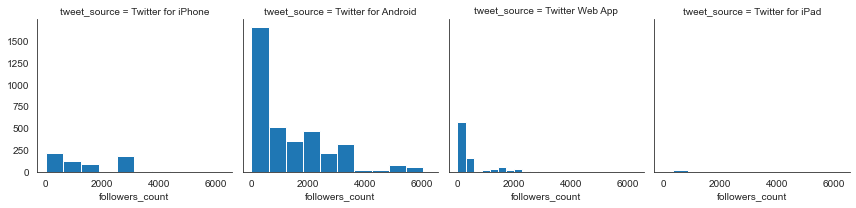

In [44]:
g = sns.FacetGrid(rev,col='tweet_source')
g.map(plt.hist,'followers_count')

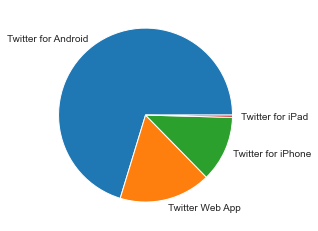

In [45]:
y = np.array([3678, 891, 641, 22])
mylabels = ["Twitter for Android", "Twitter Web App", "Twitter for iPhone", "Twitter for iPad"]
plt.pie(y, labels = mylabels)
plt.show() 

C:\Users\tusha\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\tusha\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\tusha\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\tusha\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\tusha\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\tusha\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data

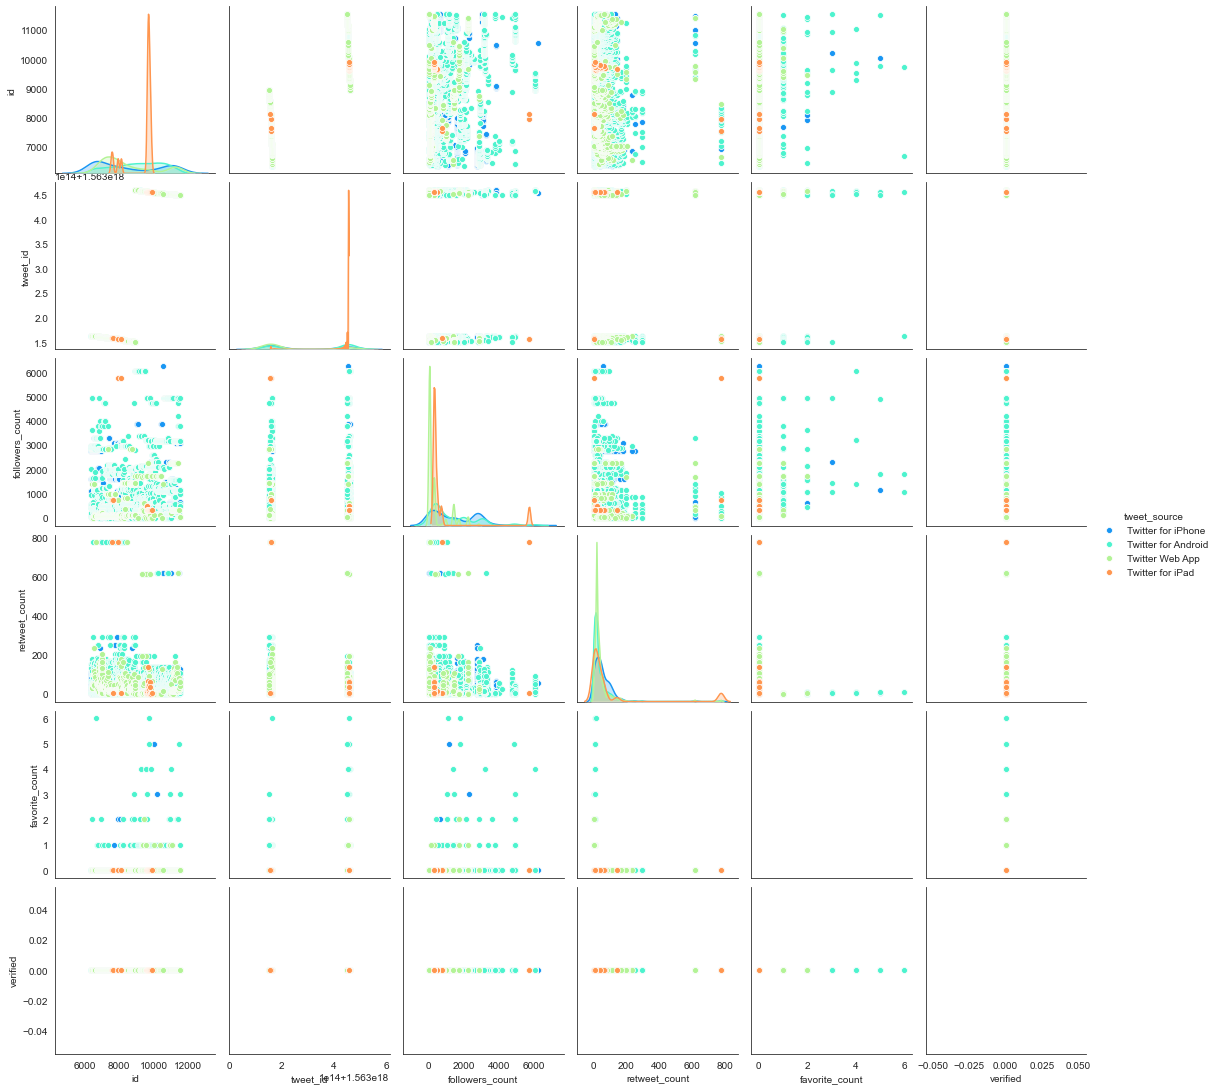

In [51]:
sns.pairplot(rev,hue="tweet_source",palette="rainbow")

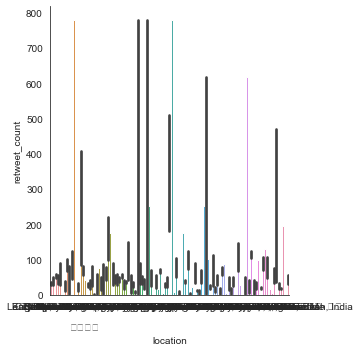

In [63]:
sns.factorplot(x='location',y='retweet_count',data=rev,kind='bar')

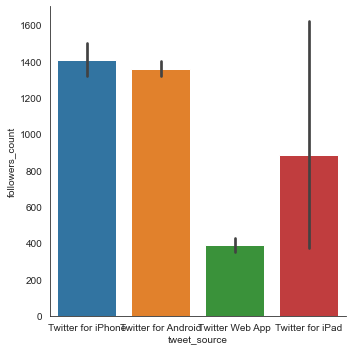

In [48]:
sns.factorplot(x='tweet_source',y='followers_count',data=rev,kind='bar')

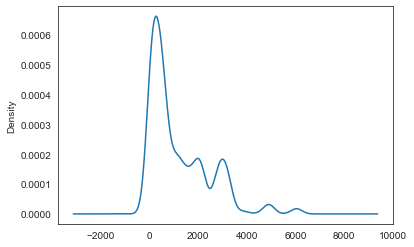

In [49]:
rev['followers_count'].plot.kde()

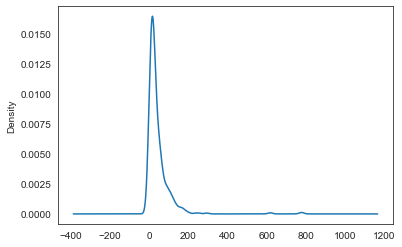

In [52]:
rev['retweet_count'].plot.kde()

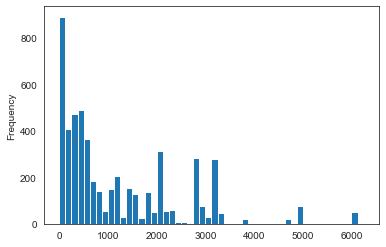

In [50]:
rev['followers_count'].plot.hist(bins=50)

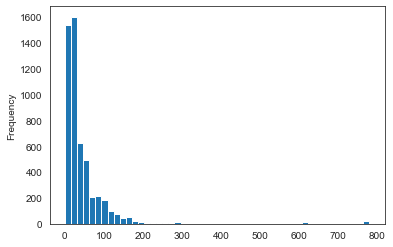

In [53]:
rev['retweet_count'].plot.hist(bins=50)